<h1><center>Sam Loyd</center></h1>
<h1><center>DSC 530</center></h1>
<h1><center>Kaggle Cardiovascular Data</center></h1>
<h1><center>November 2019</center></h1>


Hypothesis Questons:

Does being overweight as measured by the standard BMI formula using weight and height, tend to increase the likelihood of having a cardiovascular disease?  
How does gender impact the answer to the question above if at all? 

In [1]:
from __future__ import print_function, division
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

import os
plt.style.use('seaborn-whitegrid')
from scipy import stats
# from scipy.stats import skew, kurtosis, kurtosistest, stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

from matplotlib.collections import EllipseCollection

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

import thinkstats2
import thinkplot

dfcardio = pd.read_csv("cardio_train.csv",sep=";")

In [2]:
dfcardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
dfcardio.smoke.min(), dfcardio.smoke.max()

(0, 1)

In [4]:
dfcardio.alco.min(), dfcardio.alco.max()

(0, 1)

In [5]:
dfcardio.active.min(), dfcardio.active.max()

(0, 1)

In [6]:
dfcardio.gluc.min(), dfcardio.gluc.max()

(1, 3)

In [7]:
dfcardio.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

    The following codebook was taken from Ulinova's notebook.
    
    Codebook:
    
    Age | Objective Feature | age | int (days) |
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary | (Ulinova, n.d., para. 5)
    
    All of the dataset values were collected at the moment of medical examination.
    
    Codebook taken directly from author Svetlana Ulianova a Data Science Student at Ryerson University 
    Toronto, ON, Canada and posted on Kaggle.com
    
    Reference:
    Ulinova, S.  (n.d.).  EDA of cadiovascular diseases data.  Retrieved from https://www.kaggle.com/sulianova/eda-cardiovascular-data/notebook#EDA-of-cadiovascular-diseases-data

In [8]:
dfcardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<h1><center>Skew and Kurtosis</center></h1>

skewness = 0 : normal   
skewness > 0 : Right (Positive) Skew.    
skewness < 0 : Left (Negative) Skew (Geeks for Geeks, n.d.)    

Reference: 

Geeks for Geeks, (n.d.). scipy stats.skew() | Python Retrieved from https://www.geeksforgeeks.org/scipy-stats-skew-python/

Link for scipy kurtosis documetation as fisher default caused me some confustion:  
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis

Kertosis = 0 :normal distribution or  mesokurtic distribution

Kertosis < 0 :light tail platykurtic distribution

Kertosis > 0 :heavy tail leptokurtic distribution (Glen, n.d.)

Reference: 

Glen, S. (n.d.). Kurtosis: Definition, Leptokurtic, Platykurtic. Retrived from https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/kurtosis-leptokurtic-platykurtic/

In [9]:
# Verify fisher as default
stats.kurtosis(dfcardio.age)

-0.8234737410878994

Verification of fisher being default for power point presentation for package. Otherwise kurtois for normal distribution would be 3 instead of 0.

In [10]:
stats.kurtosis(dfcardio.age, fisher = True)

-0.8234737410878994

In [11]:
stats.kurtosis(dfcardio.age, fisher = False)

2.1765262589121006

<h1><center>Distribution and Outlier Analysis</center></h1>

<h1><center>Age</center></h1>

Text(0, 0.5, 'Count')

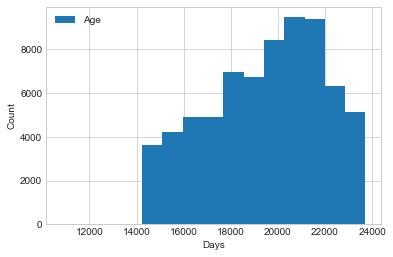

In [12]:
dfcardio.age.hist(bins=15,label="Age")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Count")

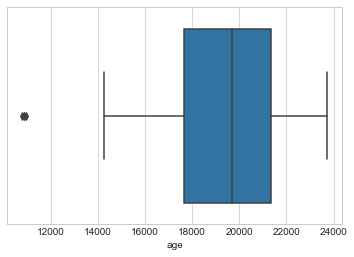

In [13]:
# Outliers?
sns.boxplot(x=dfcardio.age)
plt.show()

In [14]:
print("Max: {} \nMin: {}".format(dfcardio.age.max(), dfcardio.age.min()))

Max: 23713 
Min: 10798


In [15]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.age.mean(),dfcardio.age.median(), dfcardio.age.skew(),dfcardio.age.kurtosis(), \
       dfcardio.age.var(),dfcardio.age.std()))

    Mean: 19468.865814285713
  Median: 19703.0
    Skew: -0.3070553957245462
Kurtosis: -0.8234468444820653
Variance: 6087330.789505426
 Std Dev: 2467.2516672413913


Reasonably close to normal and only minor light tailed kurtosis.

<h1><center>Weight</center></h1>

Text(0, 0.5, 'Count')

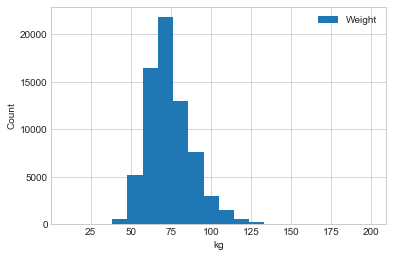

In [16]:
dfcardio.weight.hist(bins=20,label="Weight")
plt.legend()
plt.xlabel("kg")
plt.ylabel("Count")

In [17]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.weight.mean(),dfcardio.weight.median(), dfcardio.weight.skew(),dfcardio.weight.kurtosis(), \
       dfcardio.weight.var(),dfcardio.weight.std()))

    Mean: 74.20569
  Median: 72.0
    Skew: 1.0120701082089065
Kurtosis: 2.5868254500056223
Variance: 207.2378103468814
 Std Dev: 14.39575667851056


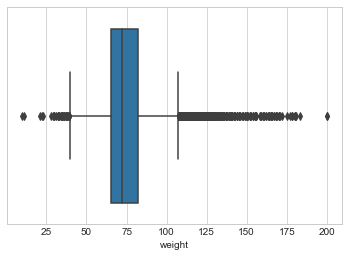

In [18]:
# Outliers?
sns.boxplot(x=dfcardio.weight)
plt.show()

In [19]:
print("Max: {} \nMin: {}".format(dfcardio.weight.max(), dfcardio.weight.min()))

Max: 200.0 
Min: 10.0


In [20]:
# Change to roughly 80 - 400 pounds to remove extremes
# using domain knowledge and reasonableness

dfcardio = dfcardio[dfcardio.weight > 36 ]

dfcardio = dfcardio[dfcardio.weight < 181]

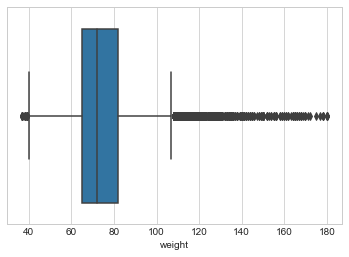

In [21]:
# Outliers?
sns.boxplot(x=dfcardio.weight)
plt.show()

Text(0, 0.5, 'Count')

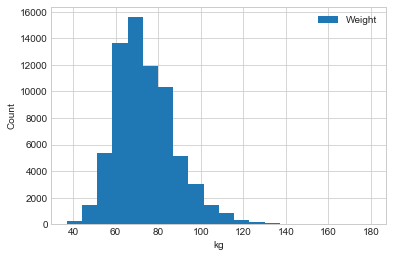

In [22]:
dfcardio.weight.hist(bins=20,label="Weight")
plt.legend()
plt.xlabel("kg")
plt.ylabel("Count")

In [23]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.weight.mean(),dfcardio.weight.median(), dfcardio.weight.skew(),dfcardio.weight.kurtosis(), \
       dfcardio.weight.var(),dfcardio.weight.std()))

    Mean: 74.21658258060829
  Median: 72.0
    Skew: 1.00217356575386
Kurtosis: 2.3654336155679774
Variance: 205.7578274094943
 Std Dev: 14.344261131529024


Slight positive skew and minor heavy tailed kurtosis 

<h1><center>Height</center></h1>

Text(0, 0.5, 'Count')

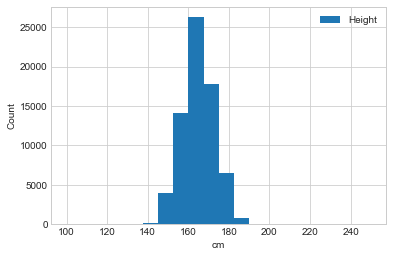

In [24]:
dfcardio.height.hist(bins=20, range=(100,250),label = "Height")
plt.legend()
plt.xlabel("cm")
plt.ylabel("Count")

In [25]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.height.mean(),dfcardio.height.median(), dfcardio.height.skew(),dfcardio.height.kurtosis(), \
       dfcardio.height.var(),dfcardio.height.std()))

    Mean: 164.36358049394008
  Median: 165.0
    Skew: -0.6394827943261461
Kurtosis: 7.9622969785301985
Variance: 67.28028750431609
 Std Dev: 8.202456187284154


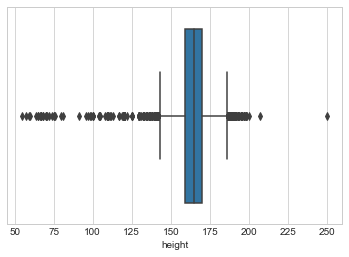

In [26]:
# Outliers?
sns.boxplot(x=dfcardio.height)
plt.show()

In [27]:
print("Max: {} \nMin: {}".format(dfcardio.height.max(), dfcardio.height.min()))

Max: 250 
Min: 55


In [28]:
# filter out < than 4 feet as probably mistakes given there are no children in study
# filter out 1 extremely tall outlier
dfcardio = dfcardio[dfcardio.height > 120]
dfcardio = dfcardio[dfcardio.height < 250]

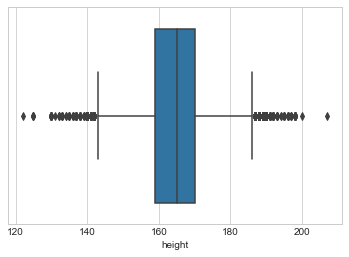

In [29]:
# Outliers?
sns.boxplot(x=dfcardio.height)
plt.show()

Text(0, 0.5, 'Count')

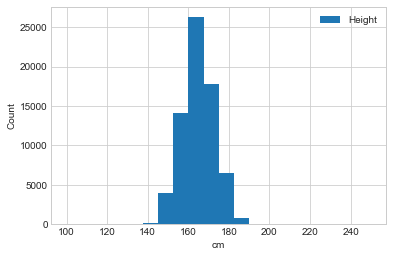

In [30]:
dfcardio.height.hist(bins=20, range=(100,250),label = "Height")
plt.legend()
plt.xlabel("cm")
plt.ylabel("Count")

In [31]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.height.mean(),dfcardio.height.median(), dfcardio.height.skew(),dfcardio.height.kurtosis(), \
       dfcardio.height.var(),dfcardio.height.std()))

    Mean: 164.43941215191322
  Median: 165.0
    Skew: 0.10908161496923831
Kurtosis: 0.22083446951193153
Variance: 61.790128519216665
 Std Dev: 7.860669724598322


Note much better kurtosis for a normal distribution after outlier removal.  Relatively normal and little kurtosis.

<h1><center>AP HI - SYSTOLIC </center></h1>

Text(0, 0.5, 'Count')

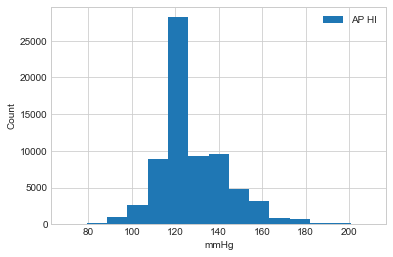

In [32]:
dfcardio.ap_hi.hist(bins=15,range=(70,210),label="AP HI")
plt.legend()
plt.xlabel("mmHg")
plt.ylabel("Count")

In [33]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.ap_hi.mean(),dfcardio.ap_hi.median(), dfcardio.ap_hi.skew(),dfcardio.ap_hi.kurtosis(), \
       dfcardio.ap_hi.var(),dfcardio.ap_hi.std()))

    Mean: 128.8291405512149
  Median: 120.0
    Skew: 85.22934787732709
Kurtosis: 7567.891089962203
Variance: 23758.589687300366
 Std Dev: 154.13821618047993


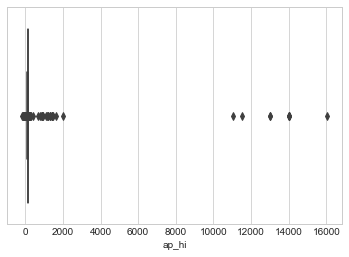

In [34]:
# Outliers?
sns.boxplot(x=dfcardio.ap_hi)
plt.show()

In [35]:
print("Max: {} \nMin: {}".format(dfcardio.ap_hi.max(), dfcardio.ap_hi.min()))

Max: 16020 
Min: -150


The following are direct quotes from the two articles:

A hypertensive (high blood pressure) crisis is when blood pressure rises quickly and severely with readings of 180/120 or greater (AHA, n.d., para 1).  

Some experts define low blood pressure as readings lower than 90 mm Hg systolic or 60 mm Hg diastolic. If either number is below that, your pressure is lower than normal (Mayo Clinic, n.d., para 17).

Reference:
AHA, (n.d.). Hypertensive Crisis: When You Should Call 9-1-1 for High Blood Pressure.  Retrieved from https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings/hypertensive-crisis-when-you-should-call-911-for-high-blood-pressure

Mayo Clinic, (n.d.). Low blood pressure (hypotension).  Retrieved from https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465

There are significant outliers skewing this data.  Some seem like clerical errors.

In [36]:
# Change to greather than 70 and less than 200
# using domain knowledge and reasonableness

dfcardio = dfcardio[dfcardio.ap_hi > 70 ]
dfcardio = dfcardio[dfcardio.ap_hi < 200]

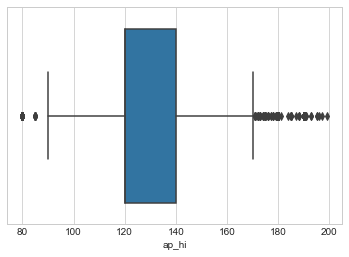

In [37]:
# Remaining Outliers?
sns.boxplot(x=dfcardio.ap_hi)
plt.show()

Text(0, 0.5, 'Count')

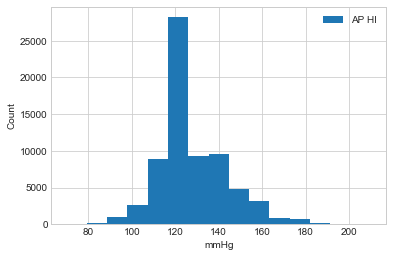

In [38]:
dfcardio.ap_hi.hist(bins=15,range=(70,210),label="AP HI")
plt.legend()
plt.xlabel("mmHg")
plt.ylabel("Count")

In [39]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.ap_hi.mean(),dfcardio.ap_hi.median(), dfcardio.ap_hi.skew(),dfcardio.ap_hi.kurtosis(), \
       dfcardio.ap_hi.var(),dfcardio.ap_hi.std()))

    Mean: 126.82905552276621
  Median: 120.0
    Skew: 0.7598588736081258
Kurtosis: 0.9333338734723617
Variance: 276.4307004050727
 Std Dev: 16.626205231653813


Very light skew to the right and minor heavy tailed kurtosis.

<h1><center>AP LO - DIASTOLIC</center></h1>

Text(0, 0.5, 'Count')

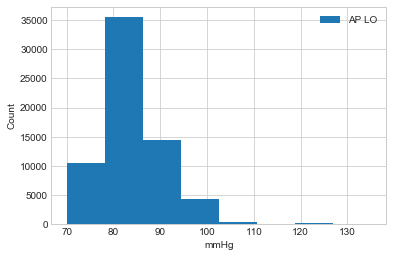

In [40]:
dfcardio.ap_lo.hist(bins=8,range=(70,135),label="AP LO")
plt.legend()
plt.xlabel("mmHg")
plt.ylabel("Count")

In [41]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.ap_lo.mean(),dfcardio.ap_lo.median(), dfcardio.ap_lo.skew(),dfcardio.ap_lo.kurtosis(), \
       dfcardio.ap_lo.var(),dfcardio.ap_lo.std()))

    Mean: 96.10039299235608
  Median: 80.0
    Skew: 32.05353870699736
Kurtosis: 1425.0086627797932
Variance: 33609.9429340965
 Std Dev: 183.33014736833792


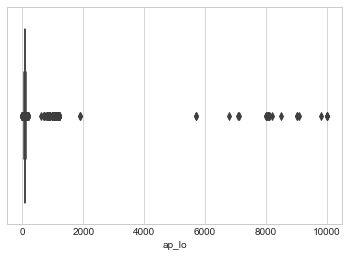

In [42]:
# Outliers?
sns.boxplot(x=dfcardio.ap_lo)
plt.show()

In [43]:
print("Max: {} \nMin: {}".format(dfcardio.ap_lo.max(), dfcardio.ap_lo.min()))

Max: 10000 
Min: 0


There are significant outliers skewing this data.  I am using domain knowledge to remove outliers.

In [44]:
# Change to greather than 40 and less than 140
# using domain knowledge and reasonableness

dfcardio = dfcardio[dfcardio.ap_lo > 40 ]
dfcardio = dfcardio[dfcardio.ap_lo < 140]

# Final check for validity systol should be less than diastol
dfcardio = dfcardio[dfcardio.ap_lo < dfcardio.ap_hi]


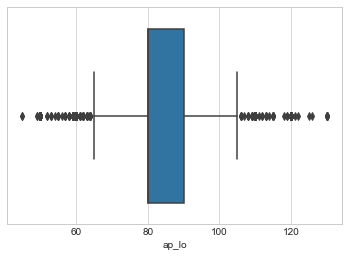

In [45]:
# Remaining Outliers?
sns.boxplot(x=dfcardio.ap_lo)
plt.show()

Text(0, 0.5, 'Count')

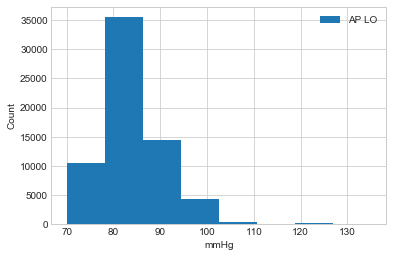

In [46]:
dfcardio.ap_lo.hist(bins=8,range=(70,135),label="AP LO")
plt.legend()
plt.xlabel("mmHg")
plt.ylabel("Count")

In [47]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.ap_lo.mean(),dfcardio.ap_lo.median(), dfcardio.ap_lo.skew(),dfcardio.ap_lo.kurtosis(), \
       dfcardio.ap_lo.var(),dfcardio.ap_lo.std()))

    Mean: 81.24775551981284
  Median: 80.0
    Skew: 0.2311814630183121
Kurtosis: 1.073681791065506
Variance: 85.98374052081441
 Std Dev: 9.272741801690286


Relatively close to normal skew but some kurtosis.

<h1><center>BMI</center></h1>
* Gather bmi from weight and height 

In [48]:
dfcardio['bmi']=round(dfcardio.weight / (dfcardio.height / 100) ** 2)

BMI   
    < 18.5 underweight  
    18.5 - 25 normal  
    25.0 - 30 overweight  
    > 30 obese 

OBESITY:  
Class 1: 30 to < 35  
Class 2: 35 to < 40  
Class 3: 40 or higher  (CDC, n.d.)
    
Reference:  
CDC, (n.d.).  Defining Adult Overweight and Obesity.  Retrieved from https://www.cdc.gov/obesity/adult/defining.html


Text(0, 0.5, 'Count')

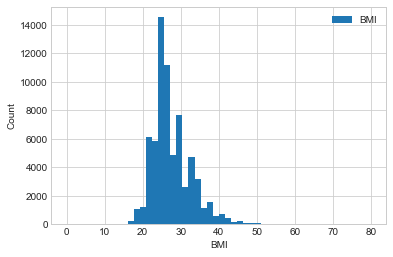

In [49]:
dfcardio.bmi.hist(bins=50,range=(0,80), label="BMI")
plt.legend()
plt.xlabel("BMI")
plt.ylabel("Count")

In [50]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.bmi.mean(),dfcardio.bmi.median(), dfcardio.bmi.skew(),dfcardio.bmi.kurtosis(), \
       dfcardio.bmi.var(),dfcardio.bmi.std()))

    Mean: 27.429975142564704
  Median: 26.0
    Skew: 1.3016507708670666
Kurtosis: 4.326707803466165
Variance: 27.18446169643634
 Std Dev: 5.2138720445017


Some right or positive Skew.

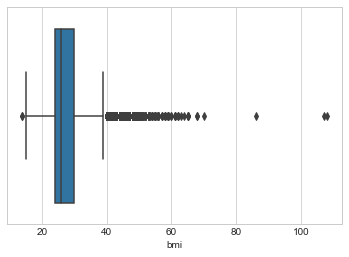

In [51]:
# Outliers?
sns.boxplot(x=dfcardio.bmi)
plt.show()

In [52]:
print("Max: {} \nMin: {}".format(dfcardio.bmi.max(), dfcardio.bmi.min()))

Max: 108.0 
Min: 14.0


I decided to remove any bmi over 100 as that is well over twice what is considered extremely obese by the cdc.

In [53]:
# filter out 2 * what is condsidered extremely obese and 
# remove < 15 to give some level of reasonableness on the lower end as well.
dfcardio = dfcardio[dfcardio.bmi < 100 ]
dfcardio = dfcardio[dfcardio.bmi > 15 ]

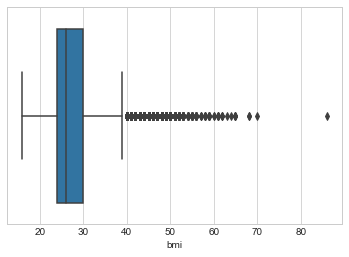

In [54]:
# Remaining Outliers?
sns.boxplot(x=dfcardio.bmi).set(
    label='Outliers') 
    
plt.show()

Text(0, 0.5, 'Count')

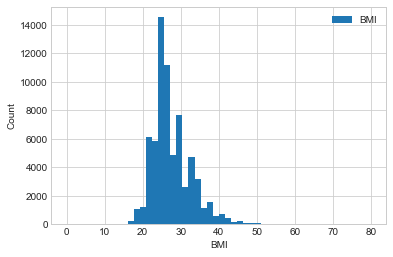

In [55]:
dfcardio.bmi.hist(bins=50,range=(0,80), label="BMI")
plt.legend()
plt.xlabel("BMI")
plt.ylabel("Count")

In [56]:
print ("    Mean: {}\n  Median: {}\n    Skew: {}\nKurtosis: {}\nVariance: {}\n Std Dev: {}".format
      (dfcardio.bmi.mean(),dfcardio.bmi.median(), dfcardio.bmi.skew(),dfcardio.bmi.kurtosis(), \
       dfcardio.bmi.var(),dfcardio.bmi.std()))

    Mean: 27.43202562752326
  Median: 26.0
    Skew: 1.215403478838704
Kurtosis: 2.7866235498032927
Variance: 26.95222741966617
 Std Dev: 5.191553468824738


Slight positive skew and heavy tailed kurtosis.

In [57]:
df_male = dfcardio[dfcardio.gender == 2]
df_female = dfcardio[dfcardio.gender == 1]

In [58]:
dfcardio.cholesterol -= 1

In [59]:
dfcardio.gender -= 1

Double check my filter as males tend to be taller. Female is now 0 and male is now 1 on the main dfcardio data frame.

In [60]:
print("  Male: {} \nFemale: {}".format(df_male.height.mean(), df_female.height.mean()))

  Male: 170.0244363269933 
Female: 161.45035580398232


In [61]:
print("  Male: {} \nFemale: {}".format(df_male.height.median(), df_female.height.median()))

  Male: 170.0 
Female: 162.0


<h1><center>Two Scenario PMF</center></h1>

In [62]:
male_pmf = thinkstats2.Pmf(df_male.bmi, label='Male')
fem_pmf = thinkstats2.Pmf(df_female.bmi, label='Female')
width=0.5

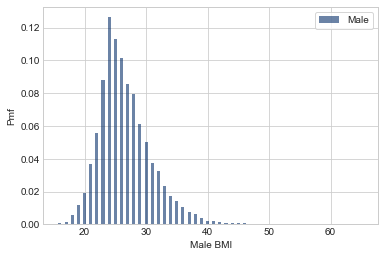

In [63]:
thinkplot.Hist(male_pmf,width=width)
thinkplot.Config(xlabel='Male BMI', ylabel='Pmf')

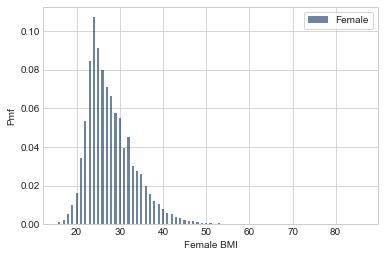

In [64]:
thinkplot.Hist(fem_pmf,width=width)
thinkplot.Config(xlabel='Female BMI', ylabel='Pmf')

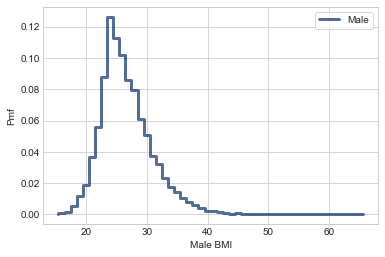

In [65]:
thinkplot.Pmf(male_pmf)
thinkplot.Config(xlabel='Male BMI', ylabel='Pmf')

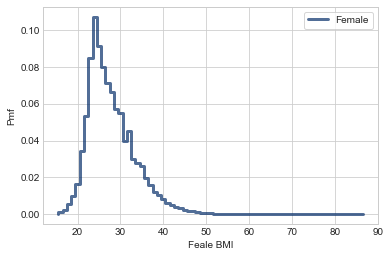

In [66]:
thinkplot.Pmf(fem_pmf)
thinkplot.Config(xlabel='Feale BMI', ylabel='Pmf')

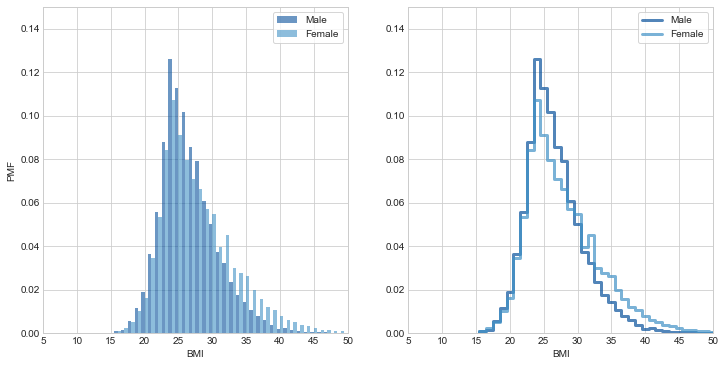

In [67]:
axis = [5, 50, 0, 0.15]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(male_pmf, align='right', width=width)
thinkplot.Hist(fem_pmf, align='left', width=width)
thinkplot.Config(xlabel='BMI', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([male_pmf, fem_pmf])
thinkplot.Config(xlabel='BMI', axis=axis)

<h1><center>CDF</center></h1>

In [68]:
cardiocdf = thinkstats2.Cdf(dfcardio.bmi, label='Overall BMI')
cardio_mal_cdf = thinkstats2.Cdf(df_male.bmi, label='Male')
cardio_fem_cdf = thinkstats2.Cdf(df_female.bmi, label='Female')

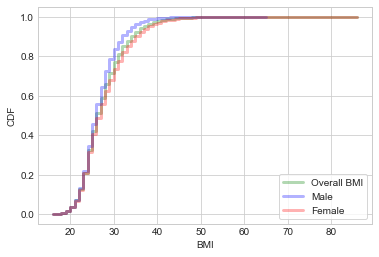

<Figure size 576x432 with 0 Axes>

In [69]:
thinkplot.Cdf(cardiocdf,color='green',alpha=0.3)
thinkplot.Cdf(cardio_mal_cdf,color='blue',alpha=0.3)
thinkplot.Cdf(cardio_fem_cdf,color='red',alpha=0.3)
thinkplot.Show(xlabel='BMI', ylabel='CDF')


This tells me that I will have to use non parametric measures for any correlation functions.

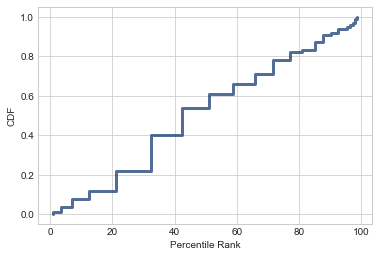

<Figure size 576x432 with 0 Axes>

In [70]:
bmi=dfcardio.bmi
sample = np.random.choice(bmi, 100, replace=True)
cdf = thinkstats2.Cdf(bmi, label='BMI')
ranks = [cdf.PercentileRank(x) for x in sample]
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='Percentile Rank', ylabel='CDF')

<h1><center>KDE</center></h1>

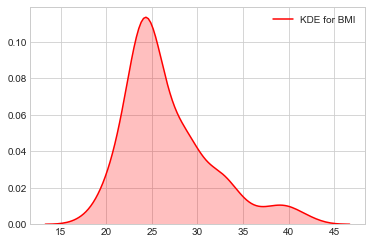

In [71]:
ax=sns.kdeplot(sample, shade=True, color="r", label = 'KDE for BMI')

Non symmetrical graph is further evidence of non normal distribution.

<h1><center>Analytical Plots</center></h1>

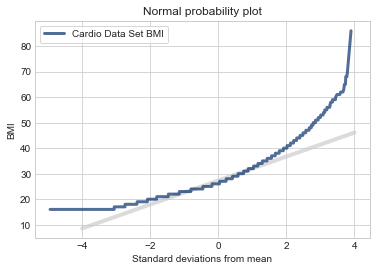

In [72]:
# Downy's function Thinkstats
mean, var = thinkstats2.TrimmedMeanVar(dfcardio.bmi, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(dfcardio.bmi)
thinkplot.Plot(xs, ys, label='Cardio Data Set BMI')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='BMI')

<function matplotlib.pyplot.show(*args, **kw)>

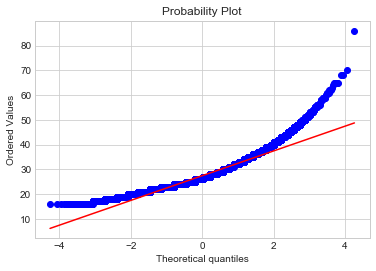

In [73]:
# Probability Plot of data
stats.probplot(dfcardio.bmi, plot=plt)
plt.show

Since this is weight data and given the deviation occurs mostly at the tails, a log normal model should be a better match.

In [74]:
logofcardio = np.log(dfcardio.bmi)

<function matplotlib.pyplot.show(*args, **kw)>

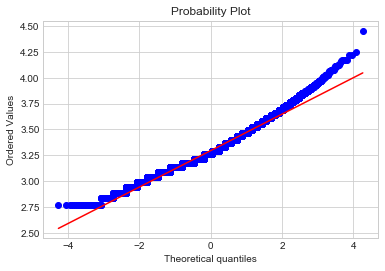

In [75]:
# Probability Plot of bmi after converted to log
stats.probplot(logofcardio, plot=plt)
plt.show

The new probability plot is a much closer, albeit still imperfect, representation by flattening out the tail on the upper end. 

### Almost all indicate a non normal distribution.

<h1><center>Scatterplots, Hexplots and Boxplots</center></h1>

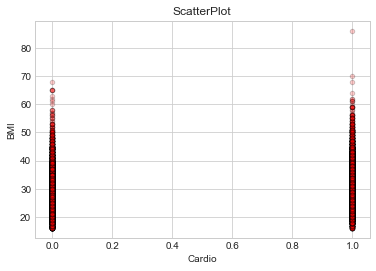

In [76]:
#  Not very interesting due to binary data
area=20
color='red'
alpha=0.2
plt.scatter(dfcardio.cardio, dfcardio.bmi, s=area, c=color, edgecolor='black', alpha=alpha)
plt.title("ScatterPlot")
plt.xlabel("Cardio")
plt.ylabel("BMI")
plt.show()

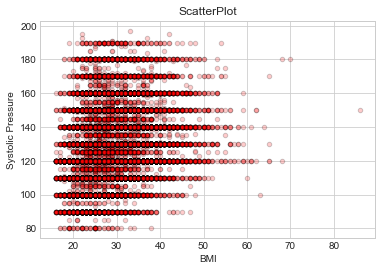

In [77]:
# Explore computed value for bmi and systolic pressure
# Difficult to determine any pattern.
area=20
color='red'
alpha=0.2
plt.scatter(dfcardio.bmi, dfcardio.ap_hi, s=area, c=color, edgecolor='black', alpha=alpha)
plt.title("ScatterPlot")
plt.xlabel("BMI")
plt.ylabel("Systolic Pressure")
plt.show()


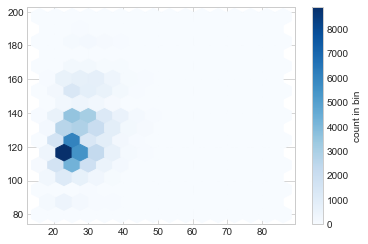

In [78]:
plt.hexbin(dfcardio.bmi, dfcardio.ap_hi, gridsize=15, cmap='Blues')
cb = plt.colorbar(label='count in bin')

Since weight and height were used to compute bmi, I wanted to see which related the most and explore that
relationship more.

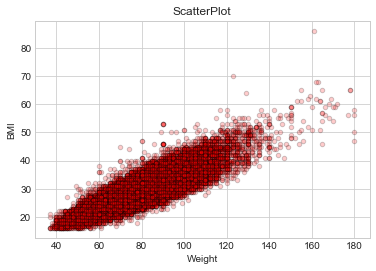

In [79]:
# Explore computed value for bmi to weight
# Since weight was used to create bmi I am not surprised by the linear nature.
area=20
color='red'
alpha=0.2
plt.scatter(dfcardio.weight, dfcardio.bmi, s=area, c=color, edgecolor='black', alpha=alpha)
plt.title("ScatterPlot")
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()


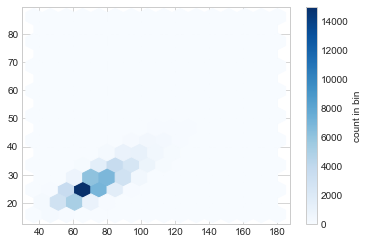

In [80]:
plt.hexbin(dfcardio.weight, dfcardio.bmi, gridsize=15, cmap='Blues')
cb = plt.colorbar(label='count in bin')

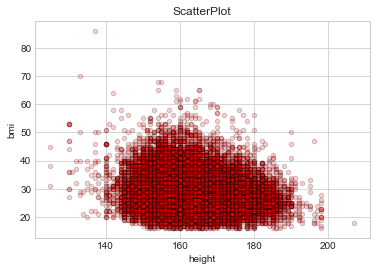

In [81]:
# The relationship between bmi and height does not appear linear.
plt.scatter(dfcardio.height, dfcardio.bmi, s=area, c=color, edgecolor='black', alpha=alpha)
plt.title("ScatterPlot")
plt.xlabel("height")
plt.ylabel("bmi")
plt.show()

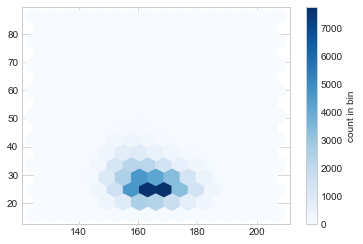

In [82]:
plt.hexbin(dfcardio.height, dfcardio.bmi, gridsize=15, cmap='Blues')
cb = plt.colorbar(label='count in bin')

Now I wanted to explore my original hypothesis more.  There is a relationship, but it is weak.
I am using different plots due to the binary nature of the data set.

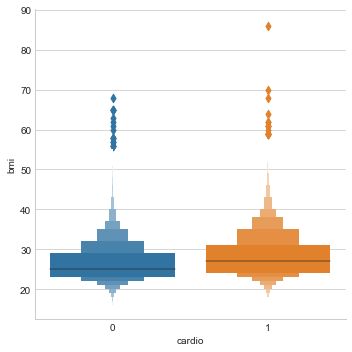

In [83]:
# Box plots seem more useful for binary data
sns.catplot(x="cardio", y="bmi", kind="boxen",
            data=dfcardio.sort_values("cardio"));

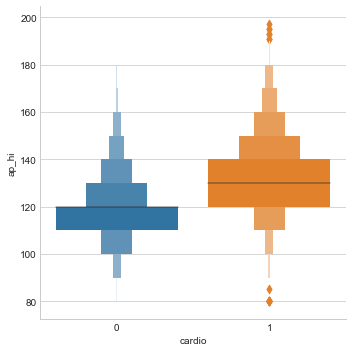

In [84]:
sns.catplot(x="cardio", y="ap_hi", kind="boxen",
            data=dfcardio.sort_values("cardio"));

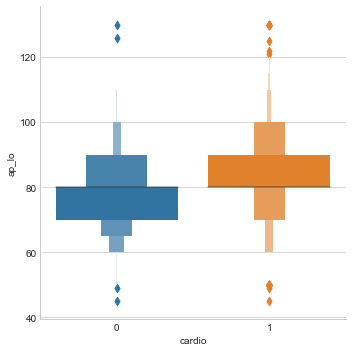

In [85]:
sns.catplot(x="cardio", y="ap_lo", kind="boxen",
            data=dfcardio.sort_values("cardio"));

<h1><center>Covariance</center></h1>
Covariance shows whether there is a positive or negative relation.  However it is 
not a measure of strength.  For that you need to look at correlation.

In [86]:
dfcardiocov = dfcardio.cov()
dfcardiocov

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,8.324414e+08,2.267208e+05,35.522366,-532.487102,-682.096142,125.481409,-233.973677,114.011332,38.325280,-31.485979,3.249525,41.345336,49.553379,-131.563906
age,2.267208e+05,6.093031e+06,-27.263498,-1676.763505,1958.624086,8527.294020,3614.102889,259.751515,139.368282,-33.271328,-16.085727,-10.049820,295.701451,1336.783610
gender,3.552237e+01,-2.726350e+01,0.227016,1.946456,1.064768,0.470648,0.292793,-0.011935,-0.005819,0.045667,0.018268,0.001032,0.001569,-0.276356
height,-5.324871e+02,-1.676764e+03,1.946456,61.481670,34.732517,2.228242,2.564562,-0.295878,-0.094585,0.434741,0.172326,-0.031070,-0.048235,-8.018778
weight,-6.820961e+02,1.958624e+03,1.064768,34.732517,202.245776,62.342874,33.252833,1.362623,0.867527,0.269252,0.214503,-0.098930,1.275437,63.788203
ap_hi,1.254814e+02,8.527294e+03,0.470648,2.228242,62.342874,264.735225,110.221781,2.157102,0.863929,0.117168,0.122760,-0.006721,3.515727,22.615596
ap_lo,-2.339737e+02,3.614103e+03,0.292793,2.564562,33.252833,110.221781,85.963507,1.016722,0.389721,0.059691,0.074039,-0.003470,1.584295,11.595521
cholesterol,1.140113e+02,2.597515e+02,-0.011935,-0.295878,1.362623,2.157102,1.016722,0.460380,0.174472,0.001888,0.005265,0.002438,0.074999,0.608350
gluc,3.832528e+01,1.393683e+02,-0.005819,-0.094585,0.867527,0.863929,0.389721,0.174472,0.326293,-0.000916,0.001289,-0.001723,0.025338,0.355386
smoke,-3.148598e+01,-3.327133e+01,0.045667,0.434741,0.269252,0.117168,0.059691,0.001888,-0.000916,0.080124,0.021565,0.002810,-0.002366,-0.049915


<h1><center>Correlation</center></h1>

Cholesterol is interesting as it is categorical, but in the context of this data it also shows degree with 1 being 
normal, 2 being elevated and 3 very elevated.

In [87]:
# Just ran for comparison.  I am more focused on Spearman's 
# cell below this one.
dfcardiocorr = dfcardio.corr()
dfcardiocorr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,1.000000,0.003183,0.002584,-0.002354,-0.001662,0.000267,-0.000875,0.005824,0.002325,-0.003855,0.000502,0.003606,0.003435,-0.000878
age,0.003183,1.000000,-0.023181,-0.086633,0.055795,0.212319,0.157916,0.155090,0.098842,-0.047618,-0.029025,-0.010246,0.239604,0.104315
gender,0.002584,-0.023181,1.000000,0.521007,0.157140,0.060710,0.066279,-0.036918,-0.021379,0.338606,0.170770,0.005451,0.006588,-0.111723
height,-0.002354,-0.086633,0.521007,1.000000,0.311475,0.017466,0.035276,-0.055614,-0.021118,0.195874,0.097886,-0.009972,-0.012304,-0.196987
weight,-0.001662,0.055795,0.157140,0.311475,1.000000,0.269427,0.252192,0.141214,0.106792,0.066886,0.067179,-0.017506,0.179381,0.863979
ap_hi,0.000267,0.212319,0.060710,0.017466,0.269427,1.000000,0.730642,0.195392,0.092954,0.025440,0.033604,-0.001040,0.432182,0.267735
ap_lo,-0.000875,0.157916,0.066279,0.035276,0.252192,0.730642,1.000000,0.161617,0.073586,0.022744,0.035567,-0.000942,0.341772,0.240899
cholesterol,0.005824,0.155090,-0.036918,-0.055614,0.141214,0.195392,0.161617,1.000000,0.450156,0.009829,0.034563,0.009041,0.221083,0.172702
gluc,0.002325,0.098842,-0.021379,-0.021118,0.106792,0.092954,0.073586,0.450156,1.000000,-0.005666,0.010047,-0.007589,0.088721,0.119839
smoke,-0.003855,-0.047618,0.338606,0.195874,0.066886,0.025440,0.022744,0.009829,-0.005666,1.000000,0.339324,0.024984,-0.016719,-0.033966


In [88]:
# Spearman 
dfcardiocorrspear = dfcardio.corr(method='spearman')
dfmcardiocorrspear = df_male[['age','ap_hi','ap_lo','cardio','bmi','cholesterol']].corr(method='spearman')
dffcardiocorrspear = df_female[['age', 'ap_hi','ap_lo','cardio','bmi','cholesterol']].corr(method='spearman')
dfcardiocorrspear

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,1.000000,0.002511,0.002590,-0.001386,-0.001703,0.002809,-0.000749,0.005485,0.002436,-0.003854,0.000504,0.003617,0.003437,-0.001260
age,0.002511,1.000000,-0.020552,-0.082121,0.062833,0.223100,0.158474,0.140641,0.091939,-0.047458,-0.029378,-0.010612,0.236163,0.109413
gender,0.002590,-0.020552,1.000000,0.534083,0.172860,0.062583,0.063974,-0.036963,-0.020023,0.338606,0.170770,0.005451,0.006588,-0.088298
height,-0.001386,-0.082121,0.534083,1.000000,0.316142,0.021054,0.031449,-0.060419,-0.024727,0.197672,0.096681,-0.008605,-0.012451,-0.179343
weight,-0.001703,0.062833,0.172860,0.316142,1.000000,0.276942,0.250260,0.136193,0.109230,0.071114,0.067813,-0.015268,0.179709,0.847056
ap_hi,0.002809,0.223100,0.062583,0.021054,0.276942,1.000000,0.741704,0.207697,0.105473,0.027221,0.034104,-0.003684,0.451041,0.279513
ap_lo,-0.000749,0.158474,0.063974,0.031449,0.250260,0.741704,1.000000,0.165536,0.080434,0.023169,0.035119,0.001817,0.355741,0.245878
cholesterol,0.005485,0.140641,-0.036963,-0.060419,0.136193,0.207697,0.165536,1.000000,0.406243,0.014873,0.039969,0.006567,0.214716,0.173237
gluc,0.002436,0.091939,-0.020023,-0.024727,0.109230,0.105473,0.080434,0.406243,1.000000,-0.000447,0.017122,-0.009572,0.090781,0.127919
smoke,-0.003854,-0.047458,0.338606,0.197672,0.071114,0.027221,0.023169,0.014873,-0.000447,1.000000,0.339324,0.024984,-0.016719,-0.025374


In [89]:
# Split for readability of results
dfcardioAcorrspear = dfcardio[['cardio','age','weight','height','ap_hi','ap_lo','cholesterol']].corr(method='spearman')
dfcardioAcorrspear

,cardio,age,weight,height,ap_hi,ap_lo,cholesterol
cardio,1.000000,0.236163,0.179709,-0.012451,0.451041,0.355741,0.214716
age,0.236163,1.000000,0.062833,-0.082121,0.223100,0.158474,0.140641
weight,0.179709,0.062833,1.000000,0.316142,0.276942,0.250260,0.136193
height,-0.012451,-0.082121,0.316142,1.000000,0.021054,0.031449,-0.060419
ap_hi,0.451041,0.223100,0.276942,0.021054,1.000000,0.741704,0.207697
ap_lo,0.355741,0.158474,0.250260,0.031449,0.741704,1.000000,0.165536
cholesterol,0.214716,0.140641,0.136193,-0.060419,0.207697,0.165536,1.000000


In [90]:
# Split for readability of results
dfcardioBcorrspear = dfcardio[['cardio','bmi','height','smoke','alco','active','gluc']].corr(method='spearman')
dfcardioBcorrspear

,cardio,bmi,height,smoke,alco,active,gluc
cardio,1.000000,0.196045,-0.012451,-0.016719,-0.008904,-0.037659,0.090781
bmi,0.196045,1.000000,-0.179343,-0.025374,0.022216,-0.009359,0.127919
height,-0.012451,-0.179343,1.000000,0.197672,0.096681,-0.008605,-0.024727
smoke,-0.016719,-0.025374,0.197672,1.000000,0.339324,0.024984,-0.000447
alco,-0.008904,0.022216,0.096681,0.339324,1.000000,0.024485,0.017122
active,-0.037659,-0.009359,-0.008605,0.024984,0.024485,1.000000,-0.009572
gluc,0.090781,0.127919,-0.024727,-0.000447,0.017122,-0.009572,1.000000


The value for pearsons correlation betwee BMI and cardio is slightly higher.  Since
I have reduced most outliers this is most likely due to the nonlineear nature of 
the relationship.

### Male

In [91]:
dfmcardiocorrspear

,age,ap_hi,ap_lo,cardio,bmi,cholesterol
age,1.000000,0.184715,0.124578,0.205867,0.075539,0.120858
ap_hi,0.184715,1.000000,0.726839,0.444406,0.277819,0.210524
ap_lo,0.124578,0.726839,1.000000,0.346984,0.248234,0.169775
cardio,0.205867,0.444406,0.346984,1.000000,0.199612,0.207231
bmi,0.075539,0.277819,0.248234,0.199612,1.000000,0.155443
cholesterol,0.120858,0.210524,0.169775,0.207231,0.155443,1.000000


### Female 

In [92]:
dffcardiocorrspear

,age,ap_hi,ap_lo,cardio,bmi,cholesterol
age,1.000000,0.247048,0.180096,0.253629,0.124868,0.150434
ap_hi,0.247048,1.000000,0.748535,0.455406,0.291368,0.210616
ap_lo,0.180096,0.748535,1.000000,0.361207,0.255891,0.167914
cardio,0.253629,0.455406,0.361207,1.000000,0.197206,0.219454
bmi,0.124868,0.291368,0.255891,0.197206,1.000000,0.178949
cholesterol,0.150434,0.210616,0.167914,0.219454,0.178949,1.000000


There is not a major difference between the correlation of male or female
to the total, but it is slightly higher for females.  Age seems to be an interesting exception.  

### Overall Correlation Heat Map
Given the non linear and non normal distribution of much of the data, I selected Spearman
for further analysis.  

(14.0, 0)

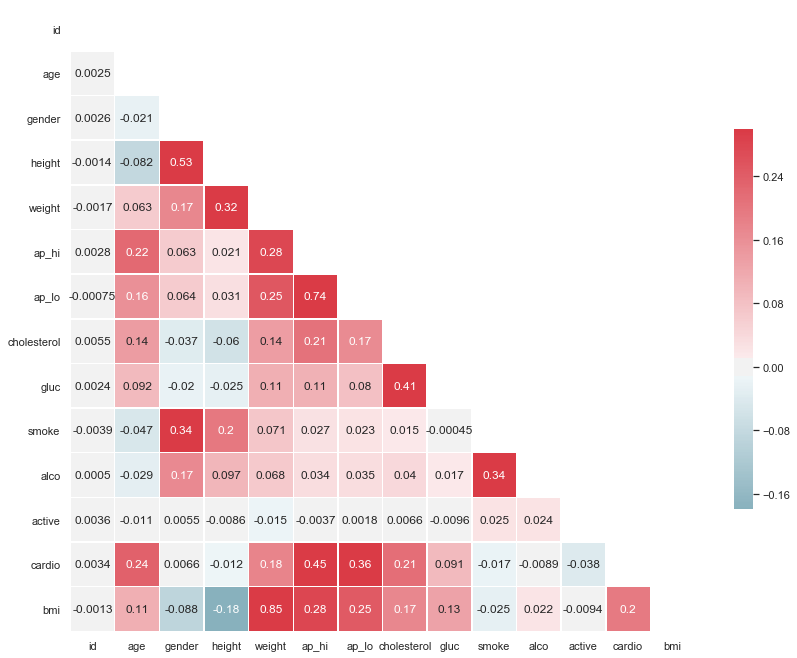

In [93]:
sns.set(style="white")


# Generate a mask for the upper triangle
mask = np.zeros_like(dfcardiocorrspear, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
ax.set_ylim(len(dfcardiocorrspear)-0.5, -0.5)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfcardiocorrspear, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_ylim(14.0, 0) # Addresses known bug in package with Jupyter


Interestingly blood pressure and age had a stronger positive correlation than BMI.
Since weight was used to build bmi, it makes sense that there is a strong correlation there.
Having a high systolic or ap_hi correlates strongly with a high distolic or ap_lo.

<h1><center>Hypothesis Testing</center></h1>

### Spearmanr Correlation Testing

H0 is that there is no correlation between gender and heart disease (cardio = 1)  
H1 is that there is a correlation between gender and heart disease (cardio = 1)

In [94]:
# Cardio - Gender Correlation
# Test weakest relation first to verify function.
# Also a test of gender as an additional 
# concern of the hypothesis
coef, p = spearmanr(dfcardio.cardio, dfcardio.gender)
# print (p)
alpha = 0.05
print('Spearmans correlation coefficient: %.3f' % coef)
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.007
Samples are uncorrelated (fail to reject H0) p=0.085


H0 is that there is no correlation between BMI and heart disease (cardio = 1) 
H1 is that there is a correlation between BMI and heart disease (cardio = 1)

In [95]:
# Cardio - BMI correlation
coef, p = spearmanr(dfcardio.cardio, dfcardio.bmi)
# print (p)
alpha = 0.05
print('Spearmans correlation coefficient: %.3f' % coef)
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.196
Samples are correlated (reject H0) p=0.000


### Confirmation of Testing

In [96]:
# Confirm correlation results with Downey's tests from our text

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

SpearmanCorr(dfcardio.cardio, dfcardio.bmi)

0.19604515593176447

In [97]:
SpearmanCorr(dfcardio.cardio, dfcardio.gender)

0.006588375866884432

In [98]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
# Confirm results with Downey's function from our text
# Test gender first
data = dfcardio.cardio, dfcardio.gender   
ht = CorrelationPermute(data)
pvalue = ht.PValue()
alpha = 0.05
if pvalue > alpha:
    print('Samples are uncorrelated (fail to reject H0) pvalue=%.3f' % pvalue)
else:
    print('Samples are correlated (reject H0) pvalue=%.3f' % pvalue)

Samples are uncorrelated (fail to reject H0) pvalue=0.087


In [99]:
# Confirm results with Downey's function from our text
data = dfcardio.cardio, dfcardio.bmi   
ht = CorrelationPermute(data)
pvalue = ht.PValue()
alpha = 0.05
if pvalue > alpha:
    print('Samples are uncorrelated (fail to reject H0) pvalue=%.3f' % pvalue)
else:
    print('Samples are correlated (reject H0) pvalue=%.3f' % pvalue)

Samples are correlated (reject H0) pvalue=0.000


### Summary
We have sufficient evidence to rule out random chance.  While it is a weak
correlation between cardio and bmi discovered in this population, it is safe to assume they are correlated.  We cannot assume the same for gender.


Biseral Point Correlation is used to measure relationship between a binary and continuous variable.  0 shows now correlation.  (Glen, 2016).

Reference:
Glen, S. (2016, July 2).  1. What is Point Biserial Correlation?  Retrieved from https://www.statisticshowto.datasciencecentral.com/point-biserial-correlation/


Link to Biseral Point Correlation Documenation:  
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html

In [100]:
stats.pointbiserialr(dfcardio.cardio, dfcardio.bmi)

PointbiserialrResult(correlation=0.19012404969092794, pvalue=0.0)

This showed little difference.

### Is obesity's impact more binary in nature?

I wanted to explore the data a little differently at this point.  For this I needed another 
categorical variable.  If a BMI is over 30 a person is considered obese, I wanted to know if that
showed a stronger correlation.

In [101]:
dfcardio['obese'] = np.where(dfcardio['bmi']>=30, 1, 0)

In [102]:
# Just look at Kendall
dfcardio[['age','weight','height','ap_hi','ap_lo','cardio','bmi','obese']].corr(method='kendall')

,age,weight,height,ap_hi,ap_lo,cardio,bmi,obese
age,1.000000,0.042526,-0.056098,0.163396,0.119685,0.192844,0.075570,0.068058
weight,0.042526,1.000000,0.227033,0.207520,0.193124,0.148534,0.685972,0.552702
height,-0.056098,0.227033,1.000000,0.016263,0.024596,-0.010372,-0.125694,-0.160734
ap_hi,0.163396,0.207520,0.016263,1.000000,0.667516,0.401926,0.212729,0.201200
ap_lo,0.119685,0.193124,0.024596,0.667516,1.000000,0.327988,0.192884,0.182748
cardio,0.192844,0.148534,-0.010372,0.401926,0.327988,1.000000,0.165115,0.156165
bmi,0.075570,0.685972,-0.125694,0.212729,0.192884,0.165115,1.000000,0.658633
obese,0.068058,0.552702,-0.160734,0.201200,0.182748,0.156165,0.658633,1.000000


In [103]:
dfcardio[['age','weight','height','ap_hi','ap_lo','cardio','bmi','obese']].corr(method="pearson")

,age,weight,height,ap_hi,ap_lo,cardio,bmi,obese
age,1.000000,0.055795,-0.086633,0.212319,0.157916,0.239604,0.104315,0.086109
weight,0.055795,1.000000,0.311475,0.269427,0.252192,0.179381,0.863979,0.678632
height,-0.086633,0.311475,1.000000,0.017466,0.035276,-0.012304,-0.196987,-0.186360
ap_hi,0.212319,0.269427,0.017466,1.000000,0.730642,0.432182,0.267735,0.220758
ap_lo,0.157916,0.252192,0.035276,0.730642,1.000000,0.341772,0.240899,0.197020
cardio,0.239604,0.179381,-0.012304,0.432182,0.341772,1.000000,0.190124,0.156165
bmi,0.104315,0.863979,-0.196987,0.267735,0.240899,0.190124,1.000000,0.796627
obese,0.086109,0.678632,-0.186360,0.220758,0.197020,0.156165,0.796627,1.000000


Obesity which is binary actually showed a lower correlation for having a cardiac condition than BMI which is continuous.

I am going to forgo this testing for now and moving on to comparing males to females with further hypothesis testing.  I will come back to this before completing the hypothesis testing section.

### Why Hypothesis Testing? ...

I took the following quote from Downey found in the text to remind me of the importance of this part of the process.

The fundamental question we want to address is whether the effects we see in a sample are likely to appear in the larger population (Downey, 2014, Chapter 9).

Reference:
Downey, A. (2014).  Think Stats 2e.  Sebastopol, CA: O'Reilly Media Inc


In [104]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

### Hypothesis Tests on Gender Grouping Means of BMI and Cardio

H0 is that there is no difference in distribution between the male and female group instances of cardio.  
H1 is that there is a difference.  
If < .05 pvalue there is a difference.

In [105]:
# Difference of means between 2 groups.
data = df_male.cardio, df_female.cardio
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print("Male/Female cardio pvalue: {}".format(pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Not enough evidence that the means are different (failed to reject HO)' % p)
else:
    print('Samples have different means (reject HO)' % p)

Male/Female cardio pvalue: 0.095
Not enough evidence that the means are different (failed to reject HO)


In [106]:
print ("Male Mean Cardio {}  Female Mean Cardio: {} Overall Mean Cardio: {} "
       .format(df_male.cardio.mean(),df_female.cardio.mean(),dfcardio.cardio.mean()))

Male Mean Cardio 0.49855145484317925  Female Mean Cardio: 0.4916380452106764 Overall Mean Cardio: 0.49404657422034987 


Now lets look at BMI,  
H0 is that there is no difference in distribution between the male and female group's mean bmi.  
H1 is that there is a difference.  
If < .05 pvalue there is a difference.

In [107]:
# DIfference of means between 2 groups
data = df_male.bmi, df_female.bmi
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print("Male/Female cardio pvalue: {}".format(pvalue))
alpha = 0.05
if pvalue > alpha:
    print('Not enough evidence that the means are different (failed to reject HO)' % p)
else:
    print('Samples have different means (reject HO)' % p)

Male/Female cardio pvalue: 0.0
Samples have different means (reject HO)


In [108]:
print ("Male Mean BMI: {}  Female Mean BMI: {} Overall Mean BMI: {} "
       .format(df_male.bmi.mean(),df_female.bmi.mean(),dfcardio.bmi.mean()))

Male Mean BMI: 26.638787420749885  Female Mean BMI: 27.85612948122208 Overall Mean BMI: 27.43202562752326 


### Summary
Despite the statistical difference in BMI means between males and females there does not seem to be a difference with the mean for cardio disease in the study population.  Since cardio is binary, it is also the probability.  

### Chai Square Test of Independence - Relationships
Some code examples were taken and  modified from Jason Brownlee's work found at
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [109]:
# Chai square test of independence
crosstab = pd.crosstab(dfcardio['cardio'], dfcardio['gender'])
crosstab

gender,0,1
cardio,,
0,22646,11943
1,21901,11874


H0 is that cardio and gender have no relation.
H1 is that there is a relationship.

In [110]:
# Chai square test of independence
stat, p, dof, expected = chi2_contingency(crosstab)

prob = .95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0) P-value: {}' .format(p))
else:
    print('Independent (fail to reject H0) P-value {}'.format(p))

Independent (fail to reject H0) P-value 0.08641810037170815


We can not conclude that cardio disease is a dependent variable of gender.

Since chi square testing is useful for checking independence of categorica data I am going back to my obesity testing.

H0 is that cardio and obese have no relation.
H1 is that there is a relationship.

In [111]:
# Chai square test of independence
crosstab = pd.crosstab(dfcardio['cardio'], dfcardio['obese'])
crosstab
# print(type(crosstab))
# print(type(dfcardio))

obese,0,1
cardio,,
0,27215,7374
1,21824,11951


In [112]:
stat, p, dof, expected = chi2_contingency(crosstab)
prob = .95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0) P-value: {}' .format(p))
else:
    print('Independent (fail to reject H0) P-value {}'.format(p))


Dependent (reject H0) P-value: 0.0


### Summary
There is a relationship between cardio disease and being obese in this population.  Even though the correlation shown was weak it is still statistically significant.  Interesting, but not as helpful as I had hoped.

<h1><center>Regression Analysis</center></h1>

### Simple

In [113]:
# As you can see bmi alone is not good at predicting heart disease,
# which is very much in line with what we saw from the correlation matrix.
model = smf.logit('cardio ~ bmi', data=dfcardio)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.674426
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                68364
Model:                          Logit   Df Residuals:                    68362
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Nov 2019   Pseudo R-squ.:                 0.02691
Time:                        19:45:38   Log-Likelihood:                -46106.
converged:                       True   LL-Null:                       -47381.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1577      0.045    -48.399      0.000      -2.245      -2.070
bmi            0.0780      0.002     48.415      0.000       0.075       0.081
==============================================================================
"""

In [114]:
actual=dfcardio.cardio
predictions = results.predict(dfcardio).round(0)
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62     34589
           1       0.59      0.49      0.54     33775

    accuracy                           0.58     68364
   macro avg       0.58      0.58      0.58     68364
weighted avg       0.58      0.58      0.58     68364



In [115]:
# confirm with another function
print ("Accuracy : ", accuracy_score(actual, predictions))

Accuracy :  0.5823825405184015


In [116]:
# Systolic blood pressure seems to give the highest accuracy alone
model = smf.logit('cardio ~ ap_hi', data=dfcardio)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.586105
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                68364
Model:                          Logit   Df Residuals:                    68362
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Nov 2019   Pseudo R-squ.:                  0.1543
Time:                        19:45:38   Log-Likelihood:                -40069.
converged:                       True   LL-Null:                       -47381.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8711      0.088   -101.296      0.000      -9.043      -8.699
ap_hi          0.0703      0.001    100.687      0.000       0.069       0.072
==============================================================================
"""

In [117]:
actual=dfcardio.cardio
predictions = results.predict(dfcardio).round(0)
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     34589
           1       0.76      0.62      0.68     33775

    accuracy                           0.71     68364
   macro avg       0.72      0.71      0.71     68364
weighted avg       0.72      0.71      0.71     68364



In [118]:
actual=dfcardio.cardio
predictions = results.predict(dfcardio).round(0)
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     34589
           1       0.76      0.62      0.68     33775

    accuracy                           0.71     68364
   macro avg       0.72      0.71      0.71     68364
weighted avg       0.72      0.71      0.71     68364



### Multiple

In [119]:
# the pseudo R^2 is not particularly high but I wanted to 
# look at accuracy as well 
# I am worry about overfit with this model, 
# but it did provide the highest value that I found manually. 
# Gender providing a higher score was also surprising given the 
# hypothesis testing.
model = smf.logit('cardio ~ bmi + ap_hi + age + C(gender)', data=dfcardio)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.569972
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                68364
Model:                          Logit   Df Residuals:                    68359
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Nov 2019   Pseudo R-squ.:                  0.1776
Time:                        19:45:39   Log-Likelihood:                -38966.
converged:                       True   LL-Null:                       -47381.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -11.9120      0.115   -103.983      0.000     -12.137     -11.688
C(gender)[T.1]    -0.0266      0.018     -1.453      0.146      -0.063       0.009
bmi                0.0341      0.002     18.989      0.000       0.031       0.038
ap_hi              0.0638      0.001     89.368      0.000       0.062       0.065
age                0.0002   3.65e-06     41.115      0.000       0.000       0.000
==================================================================================
"""

In [120]:
print(confusion_matrix(actual, predictions))

[[27866  6723]
 [12939 20836]]


In [121]:
print("Coefficeients :\n{}" .format(results.params) )

print("\np-Values: \n{}\n" .format(results.pvalues))


Coefficeients :
Intercept        -11.912034
C(gender)[T.1]    -0.026641
bmi                0.034137
ap_hi              0.063849
age                0.000150
dtype: float64

p-Values: 
Intercept         0.000000e+00
C(gender)[T.1]    1.461996e-01
bmi               2.114632e-80
ap_hi             0.000000e+00
age               0.000000e+00
dtype: float64



### Sklearn LogisticRegression Function 

### Multiple

These proved to have the same accuracy as the models that I found above.

In [122]:
# Split training data split 70-30 multiple

dfmodel = dfcardio.drop('id',axis=1)

X_train, X_test, y_train, y_test = train_test_split(dfmodel.drop('cardio',axis=1),
           dfmodel['cardio'], test_size=0.30, 
            random_state=100000)

In [123]:
# Shows all variables evaluated.
dfmodel 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,obese
0,18393,1,168,62.0,110,80,0,1,0,0,1,0,22.0,0
1,20228,0,156,85.0,140,90,2,1,0,0,1,1,35.0,1
2,18857,0,165,64.0,130,70,2,1,0,0,0,1,24.0,0
3,17623,1,169,82.0,150,100,0,1,0,0,1,1,29.0,0
4,17474,0,156,56.0,100,60,0,1,0,0,0,0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,1,168,76.0,120,80,0,1,1,0,1,0,27.0,0
69996,22601,0,158,126.0,140,90,1,2,0,0,1,1,50.0,1
69997,19066,1,183,105.0,180,90,2,1,0,1,0,1,31.0,1
69998,22431,0,163,72.0,135,80,0,2,0,0,0,1,27.0,0


In [124]:
# train model
logmodel = LogisticRegression(solver='lbfgs',max_iter=10000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
# make predictions
predictions = logmodel.predict(X_test)

In [126]:
# report matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10366
           1       0.74      0.66      0.70     10144

    accuracy                           0.72     20510
   macro avg       0.72      0.72      0.72     20510
weighted avg       0.72      0.72      0.72     20510



In [127]:
# print confusion matrix
print(confusion_matrix(y_test, predictions))

[[8043 2323]
 [3467 6677]]


Created Roc Curve using code modeled after Susan Li found at 
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

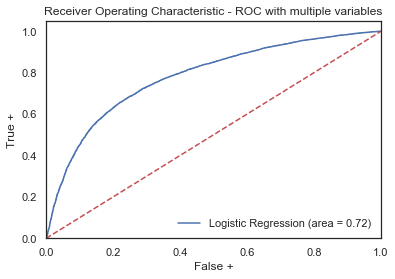

In [128]:
# ROC Curve to visualize results of false/true positives 
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False +')
plt.ylabel('True +')
plt.title('Receiver Operating Characteristic - ROC with multiple variables')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Simple using just ap_hi or systolic

In [129]:
# Just use ap_hi - single variable
dfmodel = dfcardio[['cardio','ap_hi']]
    
X_train, X_test, y_train, y_test = train_test_split(dfmodel.drop('cardio',axis=1),
           dfmodel['cardio'], test_size=0.30, 
            random_state=100000)
# train model
logmodel = LogisticRegression(solver='lbfgs',max_iter=10000)
logmodel.fit(X_train, y_train)

# make predictions
predictions = logmodel.predict(X_test)
# report matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74     10366
           1       0.75      0.61      0.68     10144

    accuracy                           0.71     20510
   macro avg       0.72      0.71      0.71     20510
weighted avg       0.72      0.71      0.71     20510



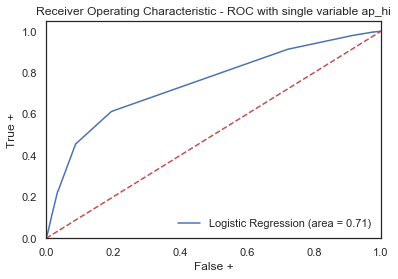

In [130]:
# ROC Curve to visualize results of false/true positives 
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False +')
plt.ylabel('True +')
plt.title('Receiver Operating Characteristic - ROC with single variable ap_hi')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Analysis and Concerns of Overfit

I think giving it all of the variables may overfit the model.  I prefer the slightly less accurate, but more elegant simplicity of the ap_hi model alone.  Both models show about a 70% ability to distinguish between positive and negative.  Just using ap_hi is almost as useful as the larger set of variables.